<a href="https://colab.research.google.com/github/Noahkandie/Pancreatic-cancer-study/blob/Dev/Cancer_survival_rates_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pancreatic Cancer : A study of Kenyatta National Hospital**

We will work as a Data Scientists to study pancreatic cancer cases among patients at Kenyatta National Hospital (KNH) and factors that influence cancer remission

In an effort to do this, we need to identify some areas and periods of interest , then perform exploratory data analysis(EDA) and hypothesis testing with regards to the claim that we will have made.

To work on this project, we will perform the following analysis with Python:

-Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
-Implement the solution by performing hypothesis testing.
The data set we are working on was collected at KNH in 2013

We assume the data was collected in an accurate manner.



Research hypothesis 1: Early detection of cancer will significantly increase remission  of pancreatic cancer compared to late detection 

H0 =There is no relationship between early detection of cancer and remission of cancer                                   

H1 =There is a relationship between early detection of cancer and remission of cancer

Research hypothesis 2: Presence of comorbidities will have a significant effect on the remission of pancreatic cancer compared to absence of comorbidities

H0:  There is no relationship between presence of comorbidities and remission of cancer 
H1 = There is a relationship between presence of comorbidities and remission of cancer 

Research hypothesis 3: The Treatment regimen will have a significant effect on the remission of pancreatic cancer compared to absence of comorbidities

H0:  There is no relationship between the treatment regimen and remission of cancer 
H1 = There is a relationship between the treatment reg and remission of cancer


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [ ]:
# Load data
df= pd.read_csv('/content/KNH_data var.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Card_No                                    64 non-null     int64  
 1   Age                                        64 non-null     int64  
 2   Gender                                     64 non-null     object 
 3   marital_status                             64 non-null     object 
 4   Education                                  64 non-null     object 
 5   occupation                                 64 non-null     object 
 6   Subsance_use                               64 non-null     object 
 7   Family_Histroy_cancer                      64 non-null     object 
 8   Histological_type                          64 non-null     object 
 9   Location_of_cancer                         64 non-null     object 
 10  stage_cancer                

In [ ]:
# Preview the head
df.head()

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0


## Data understanding

### Data cleaning

In [ ]:
# Drop unneeded columns
columns=['Card_No']
df.drop(columns=columns)

,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,73,female,married,secondary,unemployed,None,No,Adenocarcinoma,Tail,stage III,present,yes,No,No,No,No,one,Treatment refusal/missing regimen,,,,,,Progressed,Absent,,No,,Censured(Survived or Unknown status),6,,,,Progression of the disease,2.0
60,78,female,widowed,secondary,unemployed,None,No,Adenocarcinoma,Head,stage IV,present,yes,No,No,No,No,one,Pallative care,,,,Tramadol+plasil+vit K,,Progressed,Present,315,Yes,liver,death,10,6,4,,Progression of the disease,2.0
61,83,male,married,teritary,retired,Alcohol,No,Adenocarcinoma,Head,stage IV,present,no,No,Yes,No,No,one,Pallative care,,,,ERCP,,Progressed,Absent,,Yes,liver,Censured(Survived or Unknown status),13,8,5,,Progression of the disease,2.0
62,85,female,widowed,teritary,retired,None,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Chemotherapy,No,FOLFRINOX,7,,<5,No Change,Absent,,,,Censured(Survived or Unknown status),9,,,,Progression of the disease,2.0


In [ ]:
# Checking for missing values
df.isnull().value_counts()

Card_No  Age    Gender  marital_status  Education  occupation  Subsance_use  Family_Histroy_cancer  Histological_type  Location_of_cancer  stage_cancer  comorbidity  Hypertension  RVD    DM     COPD   DVT    NO_comorbdity  Treatment_Regimen  Any_Regimen_change  Types_of_chemo_regimen  No_cycles_chemo  Type_pallative_care  No_drugs_given  Size_Tumor  Tumor_markers  Type_Tumor_markers  Distant_Metastasis  Site_Metastasis  Status  Survival_time  Metastasis_free_survival  Cancer_specific_survival_after_Metastasis  Time_Recurrence  Status_Remission  Age_categories
False    False  False   False           False      False       False         False                  False              False               False         False        False         False  False  False  False  False          False              False               False                   False            False                False           False       False          False               False               False            False   Fa

In [ ]:
# After passing through the data we got an anomaly at status remission 
# we Drop that anomaly
df.drop(df.loc[df['Status_Remission']=='.'].index, inplace=True)

In [ ]:
# Check unique values
df['Status_Remission'].nunique()

4

## Explatory Data Analysis

### Univariate analysis

In [ ]:
# Age 
df['Age'].describe()

# mean age is around 60. older people affected
# std dev, means variation is high

count    63.000000
mean     60.698413
std      12.445539
min      32.000000
25%      53.000000
50%      60.000000
75%      70.000000
max      85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

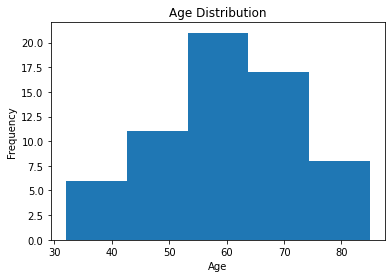

In [ ]:
# Check age distribution
age=df['Age']
#print(age)
age.plot(kind='hist',bins=5)
plt.xlabel('Age')
plt.title('Age Distribution')
# Data seems nomarlized

stage III    32
stage IV     23
stage II      5
stage I       3
Name: stage_cancer, dtype: int64


Text(0.5, 1.0, 'Cancer stages')

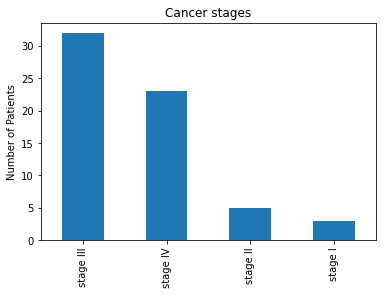

In [ ]:
# Bar graphs on cancer stages
stage=df['stage_cancer'].value_counts()
print(stage)
stage.plot(kind='bar')
plt.ylabel('Number of Patients')
plt.title('Cancer stages')
# Stage 3 and 4 comprise majority of the diagnosed stages

Text(0.5, 1.0, 'Treatment regimen Administered#')

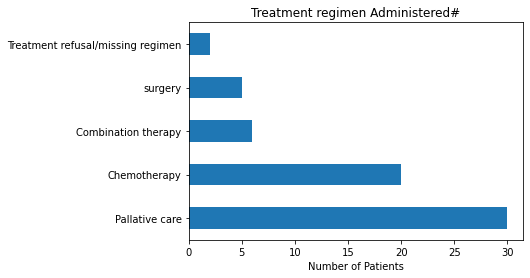

In [ ]:
# Treatment regimen bar graphs
treatment=df['Treatment_Regimen'].value_counts()
print(treatment)
treatment.plot(kind='barh')
plt.xlabel('Number of Patients')
plt.title('Treatment regimen Administered#')

# Pallative care and chemotherapy are the most used treatment plans
# Two subjects refused treatment

married     48
widowed      8
Divorced     4
single       3
Name: marital_status, dtype: int64


Text(0.5, 1.0, 'Substance abuse')

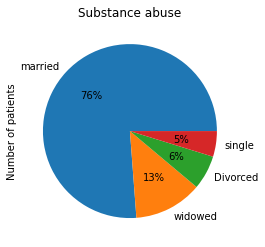

In [ ]:
# Marital status
fhc=df['marital_status'].value_counts()
print(fhc)
fhc.plot(kind='pie',autopct='%1.0f%%')
plt.ylabel('Number of patients')
plt.title('Substance abuse')

None                 41
Alcohol              13
smoking cigarette     9
Name: Subsance_use, dtype: int64


Text(0.5, 1.0, 'Substance abuse')

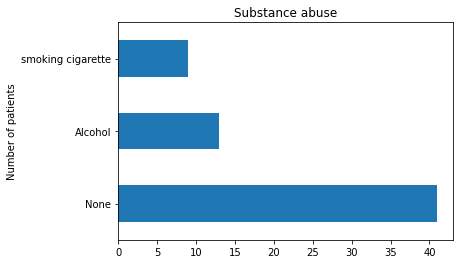

In [ ]:
# Substance abuse
fhc=df['Subsance_use'].value_counts()
print(fhc)
fhc.plot(kind='barh')
plt.ylabel('Number of patients')
plt.title('Substance abuse')

female    34
male      29
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender distributions')

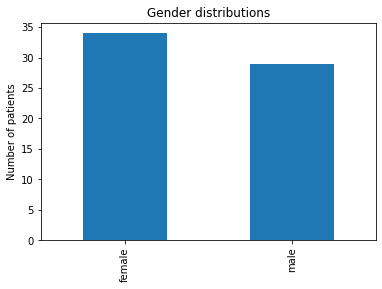

In [ ]:
# Gender bargraph
gender=df['Gender'].value_counts()
print(gender)
gender.plot(kind='bar')
plt.ylabel('Number of patients')
plt.title('Gender distributions')
# the gender distribution is 34 Females abd 30 males

present    32
absent     31
Name: comorbidity, dtype: int64


Text(0.5, 1.0, 'Commorbidity frequency among patients')

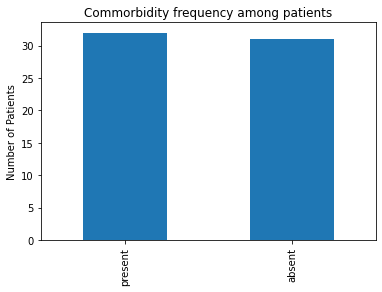

In [ ]:
# Presence of comorbidity
commobidity=df['comorbidity'].value_counts()
print(commobidity)
commobidity.plot(kind='bar')
plt.ylabel('Number of Patients')
plt.title('Commorbidity frequency among patients')
# Equal number of commorbidity presence and absence in the data

In [ ]:
# SKewness and kurtosis
skw=df['Age'].skew()
print('skewness= ',skw)
krt=df['Age'].kurt()
print('kurtosis= ',krt)

# we notice a weak negative skewness and kurtosis
# This i

skewness=  -0.10943829265637581
kurtosis=  -0.30923030832417764


### Bivariate Analysis

In [ ]:
# Preview of the dataset
df[:5]

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0


#### 1. What is the fatality rate of cancer patients across each of the stages of the disease? 

In [ ]:
# Frequency tables of stage of cancer and status of patient
df1=df.groupby('stage_cancer')
df1['Status'].value_counts()


stage_cancer  Status                              
stage I       Censured(Survived or Unknown status)     3
stage II      Censured(Survived or Unknown status)     5
stage III     Censured(Survived or Unknown status)    27
              death                                    5
stage IV      Censured(Survived or Unknown status)    15
              death                                    8
Name: Status, dtype: int64

Text(0.5, 1.0, 'Comparison of patient status and number of patients')

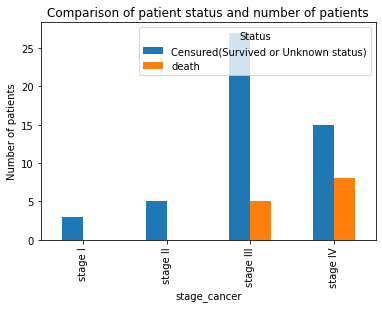

In [ ]:
# Bar graph on stage cancer and status
df1=df.groupby('stage_cancer')
df1['Status'].value_counts().unstack().plot.bar()
plt.ylabel('Number of patients')
plt.title('Comparison of patient status and number of patients')
# Death occurs in stage 3 and 4
# majority of the patients are later stages.

#### 2. What is the relationship between the stage of detection and remission in cancer patients?

In [ ]:
# Frequency table on the stage of cancer and status of remission of cancer
x=df.groupby('stage_cancer')
x['Status_Remission'].value_counts()

stage_cancer  Status_Remission          
stage I       Complete remission             1
              Non-response                   1
              Progression of the disease     1
stage II      Complete remission             2
              Partial remission              2
              Non-response                   1
stage III     Progression of the disease    24
              Non-response                   4
              Partial remission              4
stage IV      Progression of the disease    23
Name: Status_Remission, dtype: int64

Text(0.5, 1.0, 'Comparison of status of remission of cancer and number of patients')

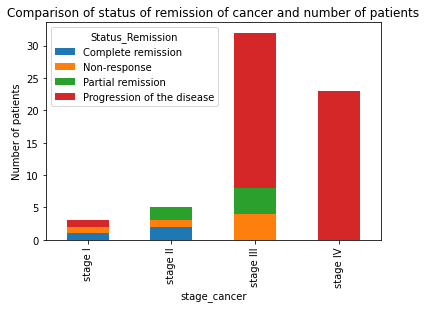

In [ ]:
# Bar Graph on the stage of cancer and status of remission of cancer
df1=df.groupby('stage_cancer')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True)
plt.ylabel('Number of patients')
plt.title('Comparison of status of remission of cancer and number of patients')

#### 3. What is the effect of underlying ailments on the remission of cancer in cancer patients?

In [ ]:
# Frequency table of commorbidity and status of remmission
aa=df.groupby('comorbidity')
aa['Status_Remission'].value_counts()

comorbidity  Status_Remission          
absent       Progression of the disease    20
             Non-response                   5
             Complete remission             3
             Partial remission              3
present      Progression of the disease    28
             Partial remission              3
             Non-response                   1
Name: Status_Remission, dtype: int64

Text(0.5, 1.0, 'Comparison of status of comorbidity and remission of cancer')

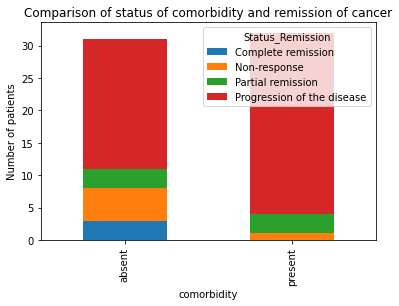

In [ ]:
# Bar graph on Comparison of status of remission of cancer and number of patients
df_1=df.groupby('comorbidity')
df_1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True,legend='center')
plt.ylabel('Number of patients')
plt.title('Comparison of status of comorbidity and remission of cancer')



In [ ]:
# Crosstab of comorbidity and Status of remission
a=df['comorbidity']
r=df['Status_Remission']
ar=pd.crosstab(a,r)
ar

Status_Remission,Complete remission,Non-response,Partial remission,Progression of the disease
comorbidity,,,,
absent,3,5,3,20
present,0,1,3,28


#### 4. What is the relationship between the treatment regimen and remission in cancer patients?

Text(0.5, 1.0, 'Comparison of status of remission of cancer and number of patients')

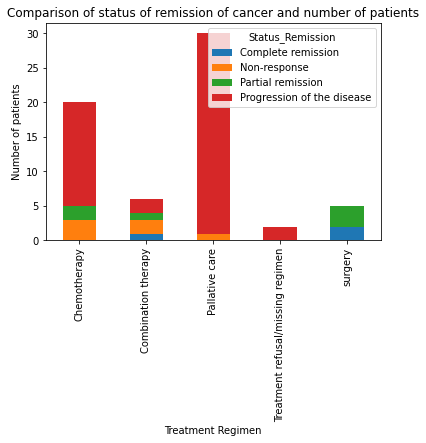

In [ ]:
# Crosstab of Treatment Regimen and Status of remission
df1=df.groupby('Treatment_Regimen')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True)
plt.ylabel('Number of patients')
plt.xlabel('Treatment Regimen')
plt.title('Comparison of status of remission of cancer and number of patients')

# Surgery indicates partial to complete remission
# The cancer progressed greatly with pallative care, chemotherapy and treatment refusal
# Combination therapy has a mix of results: all remission stages

In [ ]:
# A Percentage table of treatment regimen and remmission status
pd.crosstab(df['Treatment_Regimen'],df['Status_Remission'],normalize='index')

# Treatment refusal or missing regimen has a 100% progression of the disease
# Surgery has a 40% chance of complete remission and 60% partial remission
# Pallative care has a high cancer progression rate of 96.7% while it offers 3.3% of patients are non responsive
# Combination therapy has 16.67% complete remission, 33.33% Non response, 16.67% partial remission and 33.33% Progression of the cancer


Status_Remission,Complete remission,Non-response,Partial remission,Progression of the disease
Treatment_Regimen,,,,
Chemotherapy,0.000000,0.150000,0.100000,0.750000
Combination therapy,0.166667,0.333333,0.166667,0.333333
Pallative care,0.000000,0.033333,0.000000,0.966667
Treatment refusal/missing regimen,0.000000,0.000000,0.000000,1.000000
surgery,0.400000,0.000000,0.600000,0.000000


In [ ]:
# Frequency table of comorbidity verses Status
x=df.groupby('comorbidity')
x['Status'].value_counts()

# 9 of the patients with comorbidities died while 23 are censured
# 4 of the patients without comorbidities died while 27 are censured

comorbidity  Status                              
absent       Censured(Survived or Unknown status)    27
             death                                    4
present      Censured(Survived or Unknown status)    23
             death                                    9
Name: Status, dtype: int64

In [ ]:
# Frequency table of cancer stage and treatment regimen with status of patient
x=df.groupby(['stage_cancer','Treatment_Regimen'])
x['Status'].value_counts()

stage_cancer  Treatment_Regimen                  Status                              
stage I       Combination therapy                Censured(Survived or Unknown status)     3
stage II      Chemotherapy                       Censured(Survived or Unknown status)     1
              Combination therapy                Censured(Survived or Unknown status)     1
              surgery                            Censured(Survived or Unknown status)     3
stage III     Chemotherapy                       Censured(Survived or Unknown status)     9
                                                 death                                    1
              Combination therapy                Censured(Survived or Unknown status)     1
              Pallative care                     Censured(Survived or Unknown status)    15
                                                 death                                    3
              Treatment refusal/missing regimen  Censured(Survived or Unknown status) 

In [ ]:
# Checking for normality in the Age variable

from scipy.stats import shapiro
stat, p = shapiro(df['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
 # Sample looks gaussian

Statistics=0.987, p=0.762
Sample looks Gaussian


## Hypothesis Testing


Chi-2 test
The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.


#### Research Hypothesis 1: Early detection of cancer will significantly increase remission  of pancreatic cancer compared to late detection 

In [ ]:
# Chi square test on indendepence of Cancer stages and status of remission
ar=pd.crosstab(df['stage_cancer'],df['Status_Remission'])
from scipy.stats import chi2_contingency
chi2_contingency(ar)

# alpha=0.05
# p value= 9.165821691512042e-06
# alpha > pvalue
# We reject H0 and conclude there is evidence of association between stages of cancer and status and remission

(39.55,
 9.165821691512042e-06,
 9,
 array([[ 0.14285714,  0.28571429,  0.28571429,  2.28571429],
        [ 0.23809524,  0.47619048,  0.47619048,  3.80952381],
        [ 1.52380952,  3.04761905,  3.04761905, 24.38095238],
        [ 1.0952381 ,  2.19047619,  2.19047619, 17.52380952]]))

#### Research Hypothesis 2: Presence of comorbidities will have a significant effect on the remission of pancreatic cancer compared to absence of comorbidities

In [ ]:
# Chi square test on indendepence of comorbidities and status of remission
ar=pd.crosstab(df['comorbidity'],df['Status_Remission'])
from scipy.stats import chi2_contingency
chi2_contingency(ar)

# alpha=0.05
# p value= 0.0723
# alpha < pvalue
# We fail to reject H0 and conclude there is no evidence of assiciation between commorbidity and status and remission


(6.985887096774193,
 0.07234896166765376,
 3,
 array([[ 1.47619048,  2.95238095,  2.95238095, 23.61904762],
        [ 1.52380952,  3.04761905,  3.04761905, 24.38095238]]))

#### Research Hypothesis 3: The Treatment regimen will have a significant effect on the remission of pancreatic cancer compared to absence of comorbidities

In [ ]:
# Chi square test on indendepence of Treatment regimen and status of remission
ar=pd.crosstab(df['Treatment_Regimen'],df['Status_Remission'])
from scipy.stats import chi2_contingency
chi2_contingency(ar)

# alpha=0.05
# p value= 4.331105732985716e-06
# alpha > pvalue
# We reject H0 and conclude there is evidence of association between treatment regimen and status remission

(47.184375,
 4.331105732985716e-06,
 12,
 array([[ 0.95238095,  1.9047619 ,  1.9047619 , 15.23809524],
        [ 0.28571429,  0.57142857,  0.57142857,  4.57142857],
        [ 1.42857143,  2.85714286,  2.85714286, 22.85714286],
        [ 0.0952381 ,  0.19047619,  0.19047619,  1.52380952],
        [ 0.23809524,  0.47619048,  0.47619048,  3.80952381]]))